In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

import sys
if "../" not in sys.path:
  sys.path.append("../")

import gym
import plotting
from lib.envs.blackjack import BlackjackEnv
matplotlib.style.use('ggplot')

In [20]:
env = BlackjackEnv()

## TD(0)

In [21]:
def random_policy(observation):
    player_score, dealer_score, usable_ace = observation
    
    # Stick (action 0) if the score is > 20, hit (action 1) otherwise
    return 0 if player_score >= 20 else 1

In [22]:
def td_0_prediction(policy, env, num_episodes, alpha=1.0, discount=1.0, debug=False):
    
    V = defaultdict(float)
    
    for i_episode in range(1, num_episodes+1):
        
        if debug:
            if i_episode % 100000 == 0:
                print("\rEpisode {}/{}.".format(i_episode, num_episodes))
                
        state=env.reset()
        while(True):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            V[state] += alpha * (reward + discount*V[next_state] - V[state])
            if done:
                break
            state = next_state
            
                
    return V

Episode 100000/500000.
Episode 200000/500000.
Episode 300000/500000.
Episode 400000/500000.
Episode 500000/500000.


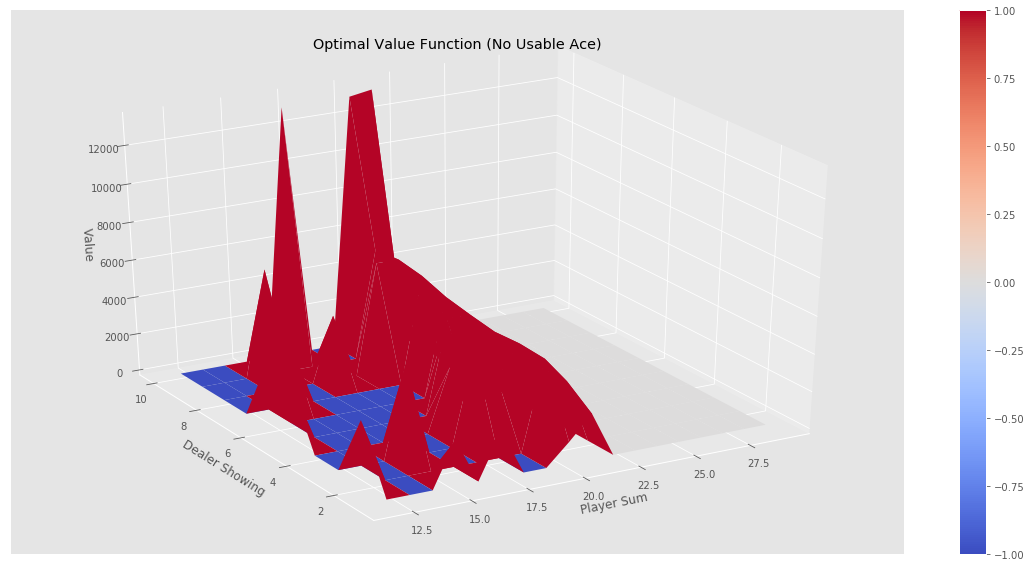

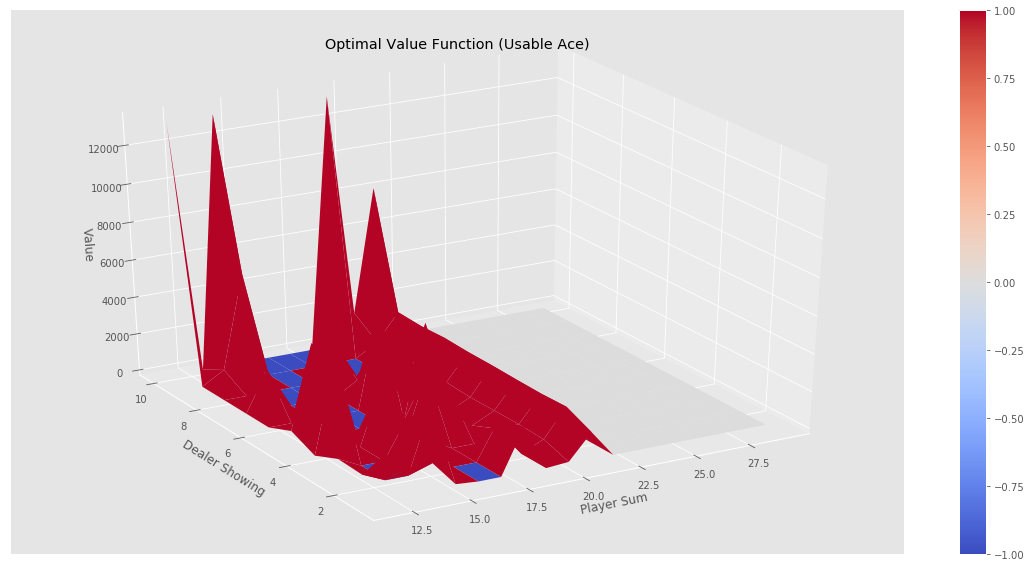

In [23]:
V = td_0_prediction(random_policy, env, num_episodes=500000, debug=True)
plotting.plot_value_function(V, title="Optimal Value Function")